In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
sns.set(color_codes=True)

In [2]:
df=pd.read_csv('cleaned_data.csv')
df

,Unnamed: 0,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N


In [5]:
print(df.columns)

Index(['Unnamed: 0', 'date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')


In [7]:
print("Missing values")
print(df[['date', 'demand',	'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall', 'school_day', 'holiday']].isnull().sum())

Missing values
date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64


**1.DEMAND AND PRICE ANALYSIS**

**Daily demand analysis**

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df['date']= pd.to_datetime(df['date'])

In [15]:
df['Day']=df['date'].dt.day
daily_demand=df.groupby('Day')['demand'].mean()

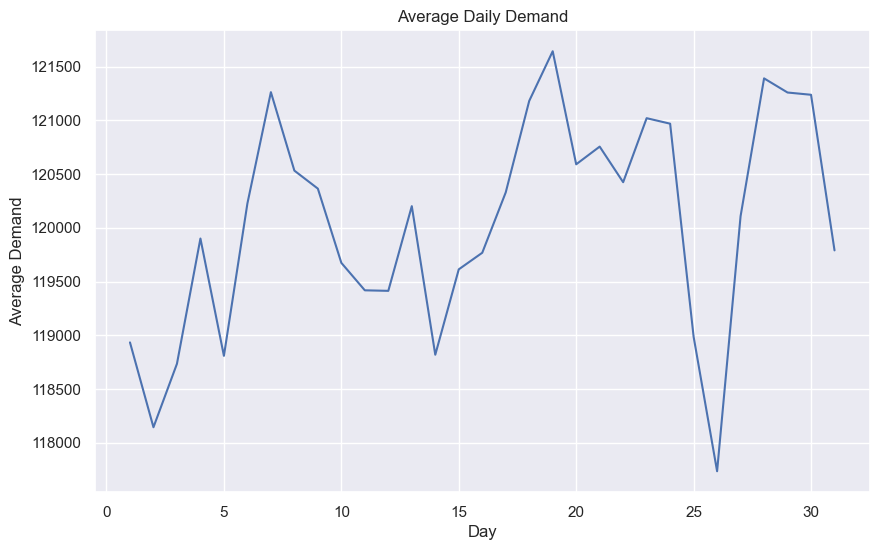

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_demand.index, y=daily_demand.values)
plt.title('Average Daily Demand')
plt.xlabel('Day')
plt.ylabel('Average Demand')
plt.show()

**Weekly analysis**

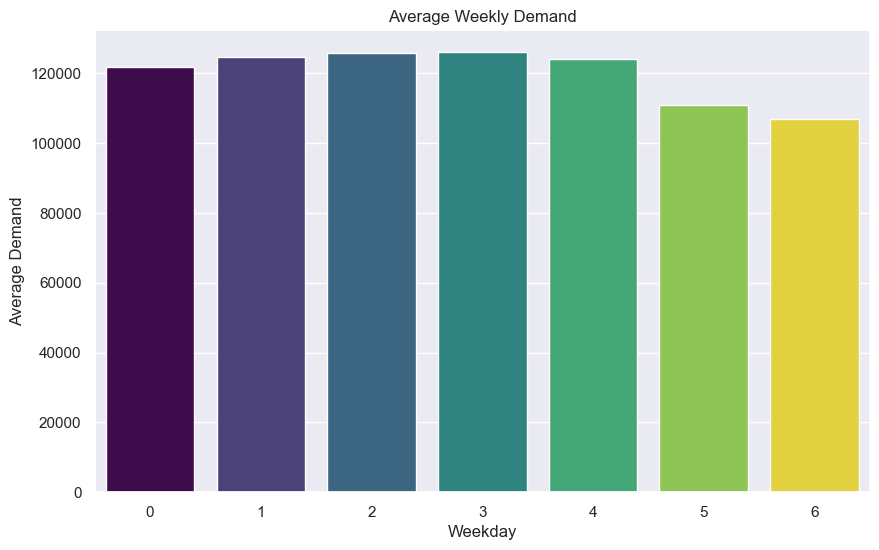

In [20]:
df['Weekday'] = df['date'].dt.weekday
weekly_demand = df.groupby('Weekday')['demand'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='demand', data=weekly_demand, palette='viridis', hue='Weekday', dodge=False)
plt.title('Average Weekly Demand')
plt.xlabel('Weekday')
plt.ylabel('Average Demand')
plt.legend([],[], frameon=False)
plt.show()

**Monthly analysis**

In [23]:
df['month']=df['date'].dt.month

In [25]:
monthly_demand=df.groupby('month')['demand'].mean()

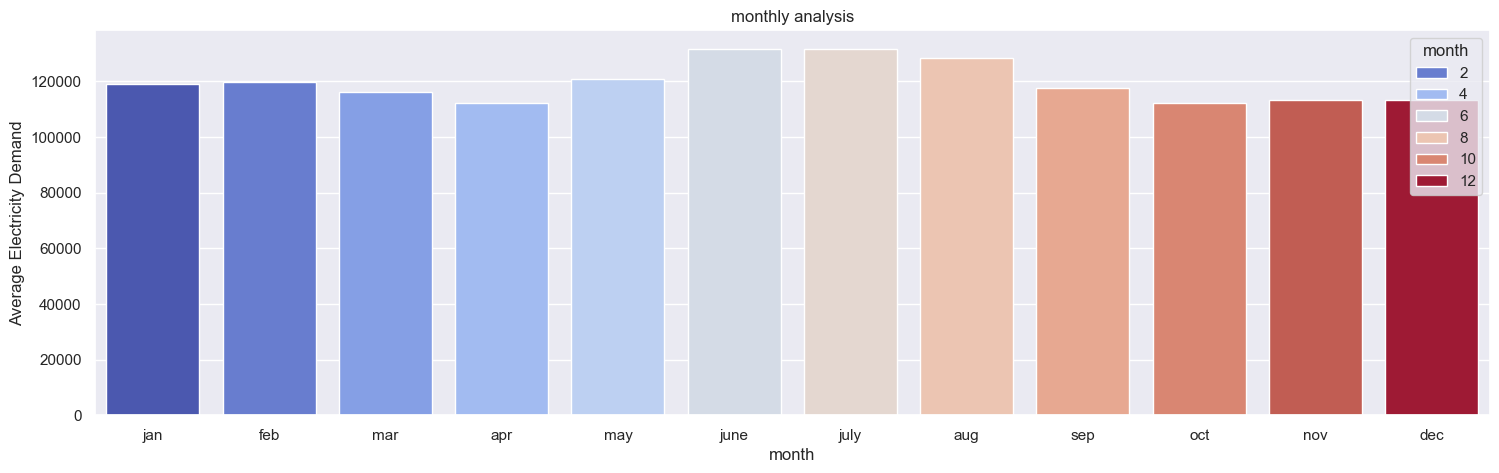

In [27]:
plt.figure(figsize=(18, 5))
sns.barplot(x=monthly_demand.index, y=monthly_demand.values,hue=monthly_demand.index,palette="coolwarm")
plt.xlabel("month")
plt.ylabel("Average Electricity Demand")
plt.title("monthly analysis")
plt.xticks(range(0, 12),["jan","feb","mar","apr","may","june","july","aug","sep","oct","nov","dec"])
plt.show()

**Relation b/w demand and electricity price(RRP)**

Text(0.5, 1.0, 'Relation between demand and price')

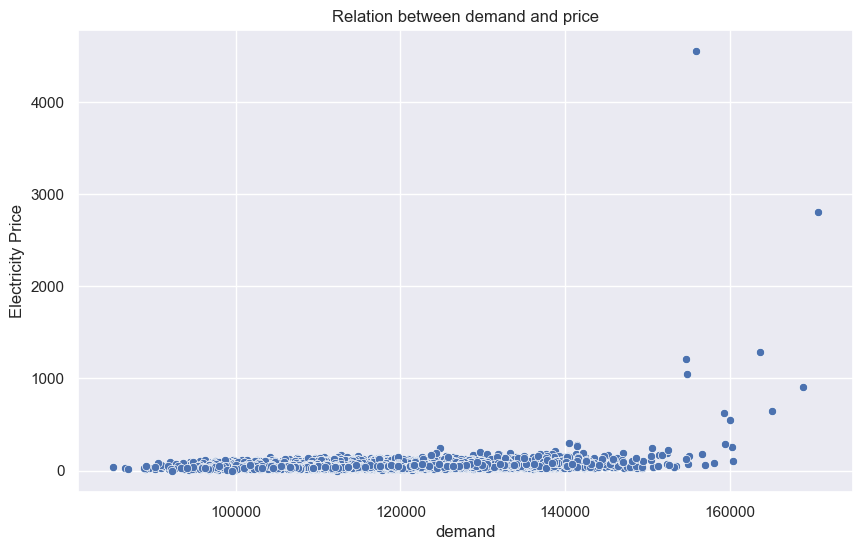

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='demand',y='RRP')
plt.xlabel("demand")
plt.ylabel("Electricity Price")
plt.title("Relation between demand and price")

**2.WEATHER IMPACT ANALYSIS**

**Corelate demand with temp,solar exposure,rainfall**

min_temperature   -0.156118
max_temperature   -0.073216
solar_exposure    -0.256988
rainfall          -0.064662
Name: demand, dtype: float64


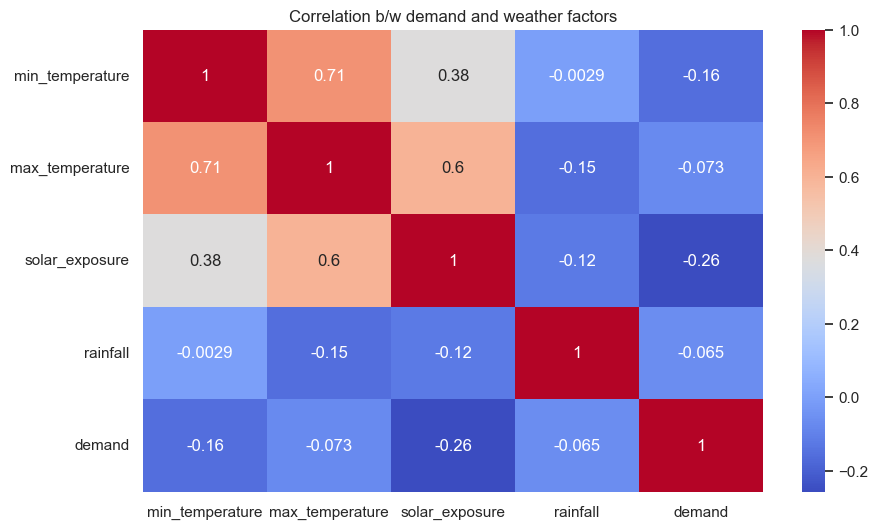

In [34]:
weather_factors = ['min_temperature','max_temperature','solar_exposure','rainfall']
correlations = df[weather_factors + ['demand']].corr()['demand'].drop('demand')
print(correlations)
plt.figure(figsize=(10, 6))
sns.heatmap(df[weather_factors + ['demand']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation b/w demand and weather factors")
plt.show()

**Analyse seasonal trends**

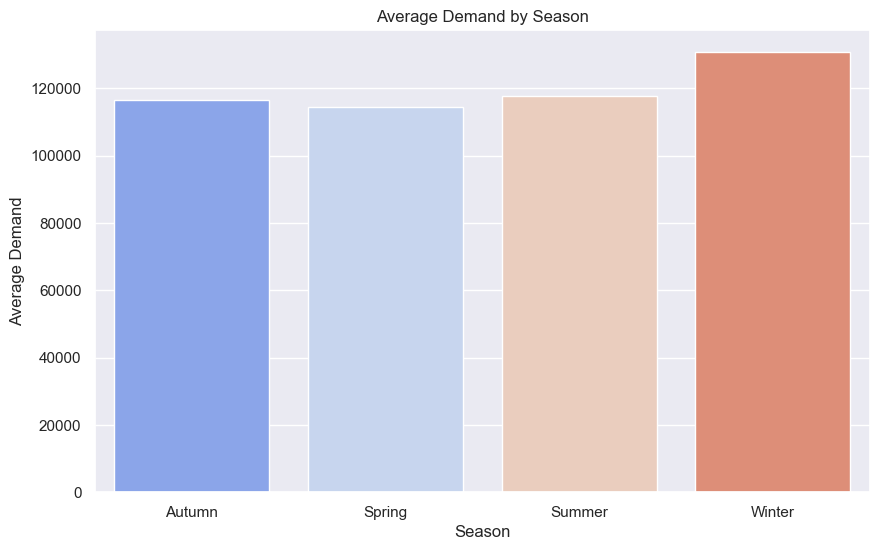

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where 'date' conversion failed (if any)
df = df.dropna(subset=['date'])

# Function to get the season based on Australian months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Extract month and assign season
df['Month'] = df['date'].dt.month
df['Season'] = df['Month'].apply(get_season)

# Analyze seasonal trends
seasonal_demand = df.groupby('Season')['demand'].mean().reset_index()

# Plot average demand by season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='demand', data=seasonal_demand, palette='coolwarm', hue='Season', dodge=False)
plt.title('Average Demand by Season')
plt.xlabel('Season')
plt.ylabel('Average Demand')
plt.legend([], [], frameon=False)  # Hide legend since hue is identical to x-axis
plt.show()

**3.OPERATINAL EFFICIENCY & SPECIAL EVENT ANALYSIS**

**Impact of holidays and school days on demand**

In [41]:
df=pd.read_csv('cleaned_data.csv')
df

,Unnamed: 0,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N


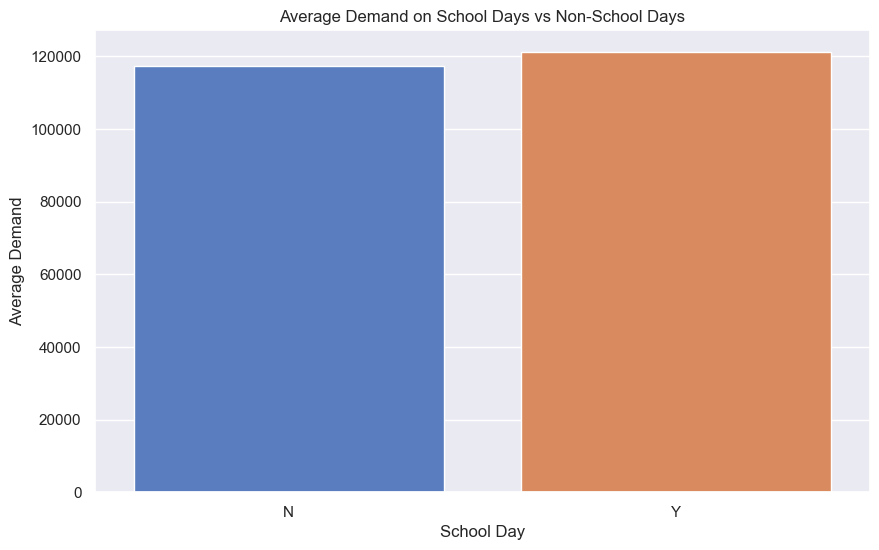

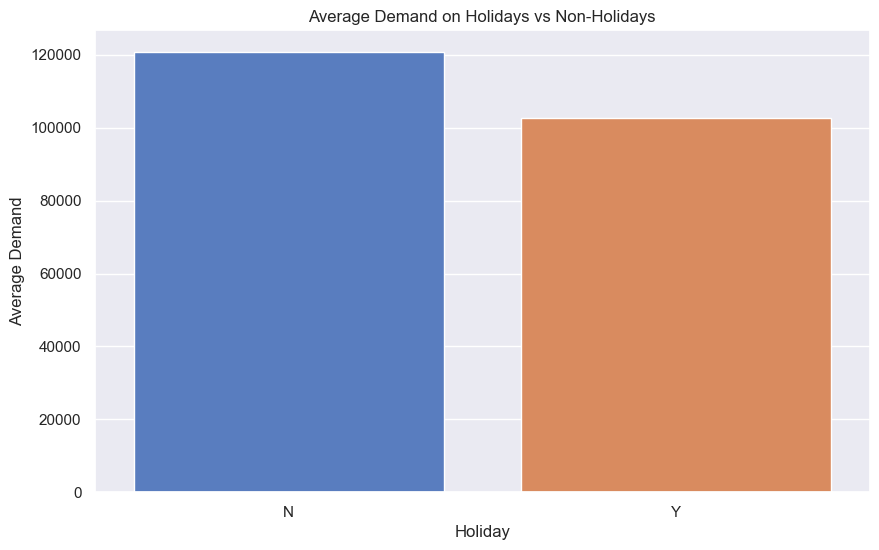

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'school_day' and 'holiday' columns exist
if 'school_day' in df.columns and 'demand' in df.columns:
    school_day_demand = df.groupby('school_day')['demand'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='school_day', y='demand', data=school_day_demand, palette='muted', hue='school_day', dodge=False)
    plt.title('Average Demand on School Days vs Non-School Days')
    plt.xlabel('School Day')
    plt.ylabel('Average Demand')
    plt.legend([], [], frameon=False)
    plt.show()
else:
    print("Error: 'school_day' or 'demand' column is missing in the dataset.")

# Study the impact of holidays on demand
if 'holiday' in df.columns and 'demand' in df.columns:
    holiday_demand = df.groupby('holiday')['demand'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='holiday', y='demand', data=holiday_demand, palette='muted', hue='holiday', dodge=False)
    plt.title('Average Demand on Holidays vs Non-Holidays')
    plt.xlabel('Holiday')
    plt.ylabel('Average Demand')
    plt.legend([], [], frameon=False)
    plt.show()
else:
    print("Error: 'holiday' or 'demand' column is missing in the dataset.")

**Anomalies and unusual events**

In [51]:
df=pd.read_csv('cleaned_data.csv')
df

,Unnamed: 0,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N


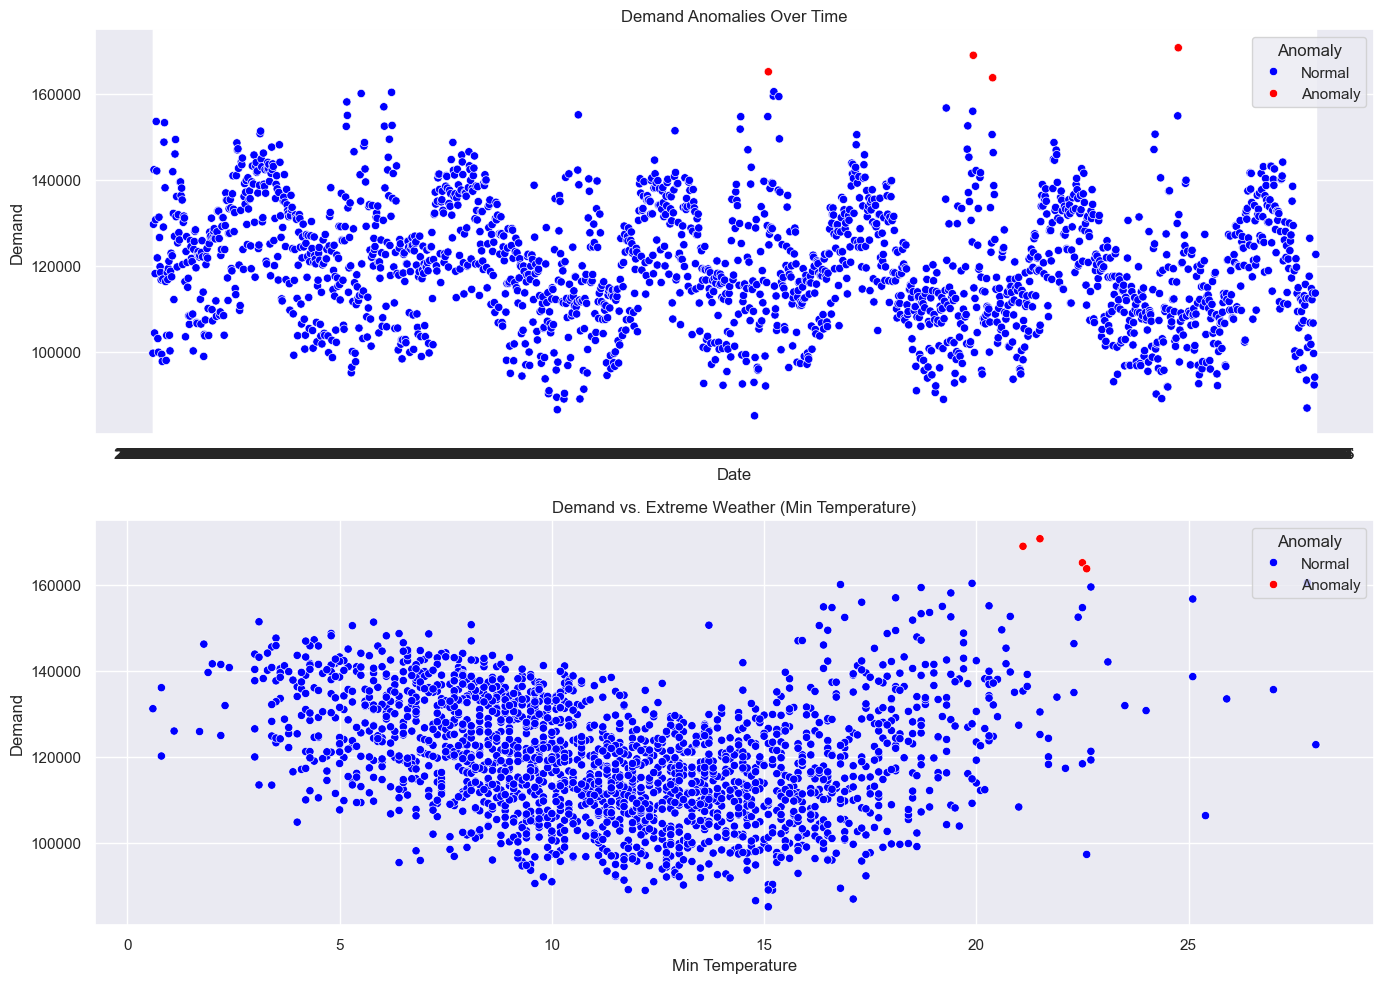

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Ensure proper import
import seaborn as sns
from scipy import stats

# Example DataFrame (Replace with your actual data)
# df = pd.read_csv("your_dataset.csv")

# Calculate Z-scores for demand to identify anomalies
df['demand_zscore'] = stats.zscore(df['demand'])

# Define threshold for anomalies (e.g., Z-score > 3)
df['is_anomaly'] = df['demand_zscore'].abs() > 3

# ✅ Ensure plt is correctly referenced
plt.figure(figsize=(14, 10))  

# Plot demand anomalies over time
plt.subplot(2, 1, 1)
sns.scatterplot(
    x='date', y='demand', data=df, hue='is_anomaly', 
    palette={False: 'blue', True: 'red'}, legend='full'
)
plt.title('Demand Anomalies Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')

# Correcting the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Normal', 'Anomaly'], title='Anomaly', loc='upper right')

# Plot demand vs. extreme weather (min temperature)
plt.subplot(2, 1, 2)
sns.scatterplot(
    x='min_temperature', y='demand', data=df, hue='is_anomaly', 
    palette={False: 'blue', True: 'red'}, legend='full'
)
plt.title('Demand vs. Extreme Weather (Min Temperature)')
plt.xlabel('Min Temperature')
plt.ylabel('Demand')

# Correcting the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Normal', 'Anomaly'], title='Anomaly', loc='upper right')

plt.tight_layout()
plt.show()

**4.ANOMALY DETECTION & OUTLIER ANALYSIS**

**Demand outliers and investigate potential causes**

Index(['Unnamed: 0', 'date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday', 'demand_zscore', 'is_anomaly', 'demand_capped', 'Month',
       'Season'],
      dtype='object')
Potential Causes of Outliers:
Holidays: 0
Operational Issues (Non-School Days): 0
Extreme Weather Events: 4


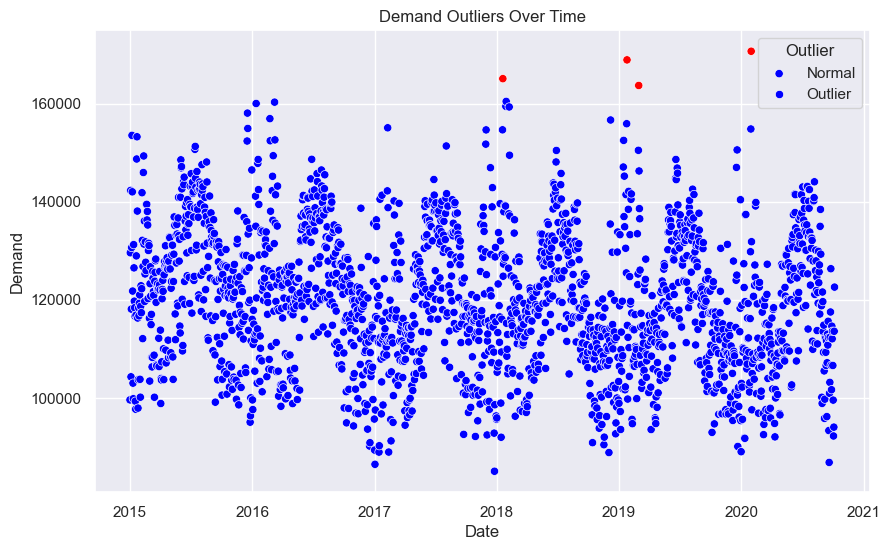

In [149]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'demand' column exists
print(df.columns)  # Check for column names

# Fill missing values if any
df['demand'] = df['demand'].fillna(df['demand'].median())

# Calculate Z-scores
df['demand_zscore'] = stats.zscore(df['demand'])

# Identify outliers (Z-score > 3 or < -3)
outliers = df[df['demand_zscore'].abs() > 3]

# Investigate potential causes
external_events = outliers[outliers['holiday'] == 1]  # Holiday-based outliers
operational_issues = outliers[outliers['school_day'] == 0]  # Non-school days
extreme_weather = outliers[
    (outliers['min_temperature'] > df['min_temperature'].quantile(0.95)) |
    (outliers['max_temperature'] > df['max_temperature'].quantile(0.95))
]

# Print summary
print("Potential Causes of Outliers:")
print(f"Holidays: {len(external_events)}")
print(f"Operational Issues (Non-School Days): {len(operational_issues)}")
print(f"Extreme Weather Events: {len(extreme_weather)}")

# Visualize outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='date', y='demand', data=df, hue=df['demand_zscore'].abs() > 3, palette={False: "blue", True: "red"})
plt.title('Demand Outliers Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend(title="Outlier", labels=["Normal", "Outlier"])
plt.show()


**Strategies to Handle Anomalies/Outliers for Accurate Forecasting**

1. Isolation Forest (IForest):

Detects anomalies by partitioning data randomly.
Anomalies get isolated quickly due to their unique distribution.

2. Local Outlier Factor (LOF):

Measures local density deviations of data points.
Lower density = Higher likelihood of an outlier.

3.DBSCAN (Density-Based Clustering):

Clusters dense regions, treating sparse points as anomalies.

**5.REVENUE AND COST OPTIMIZATION OPPORTUNITIES**

**Cost optimization strategies for electricity demand**

1. Energy Efficiency Improvements: Upgrade to energy-efficient appliances and lighting (like LED bulbs). These consume less electricity and can significantly reduce your energy bills.

2. Smart Meters and Monitoring: Install smart meters to monitor your electricity usage in real-time. This helps you identify peak usage times and adjust your consumption accordingly.

3. Demand Response Programs: Participate in demand response programs offered by your utility company. These programs incentivize you to reduce or shift your electricity usage during peak demand times.

4. Time-of-Use Pricing: If your utility offers time-of-use pricing, try to use electricity during off-peak hours when rates are lower. This might involve running appliances like dishwashers or laundry machines late at night or early in the morning.

5. Load Shifting: Shift high-energy-consuming activities (like heating, cooling, or running heavy machinery) to times when electricity is cheaper.

6. Renewable Energy Sources: Consider investing in renewable energy sources like solar panels. They can reduce your reliance on grid electricity and lower your bills in the long run.

**Low or negative price periods**

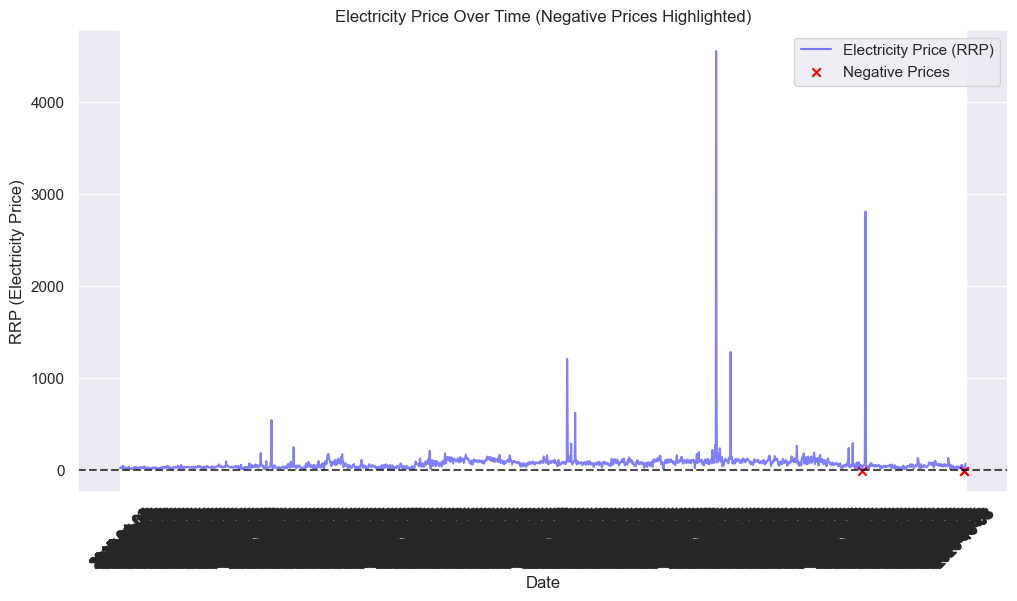

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'RRP' is numeric to avoid errors
df['RRP'] = pd.to_numeric(df['RRP'], errors='coerce')

# Drop rows where 'RRP' is NaN
df = df.dropna(subset=['RRP'])

# Set the low-price threshold
low_price_threshold = 0  # Change if needed (e.g., 10 for low prices)

# Filter for negative or very low price periods
low_price_periods = df[df['RRP'] < low_price_threshold]

# Plot electricity prices over time, highlighting negative periods
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['RRP'], label="Electricity Price (RRP)", color='blue', alpha=0.5)
plt.scatter(low_price_periods['date'], low_price_periods['RRP'], color='red', label="Negative Prices", marker='x')
plt.axhline(0, color='black', linestyle="dashed", alpha=0.7)  # Zero price line

# Formatting
plt.title("Electricity Price Over Time (Negative Prices Highlighted)")
plt.xlabel("Date")
plt.ylabel("RRP (Electricity Price)")
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)

plt.show()

**Correlation b/w columns**

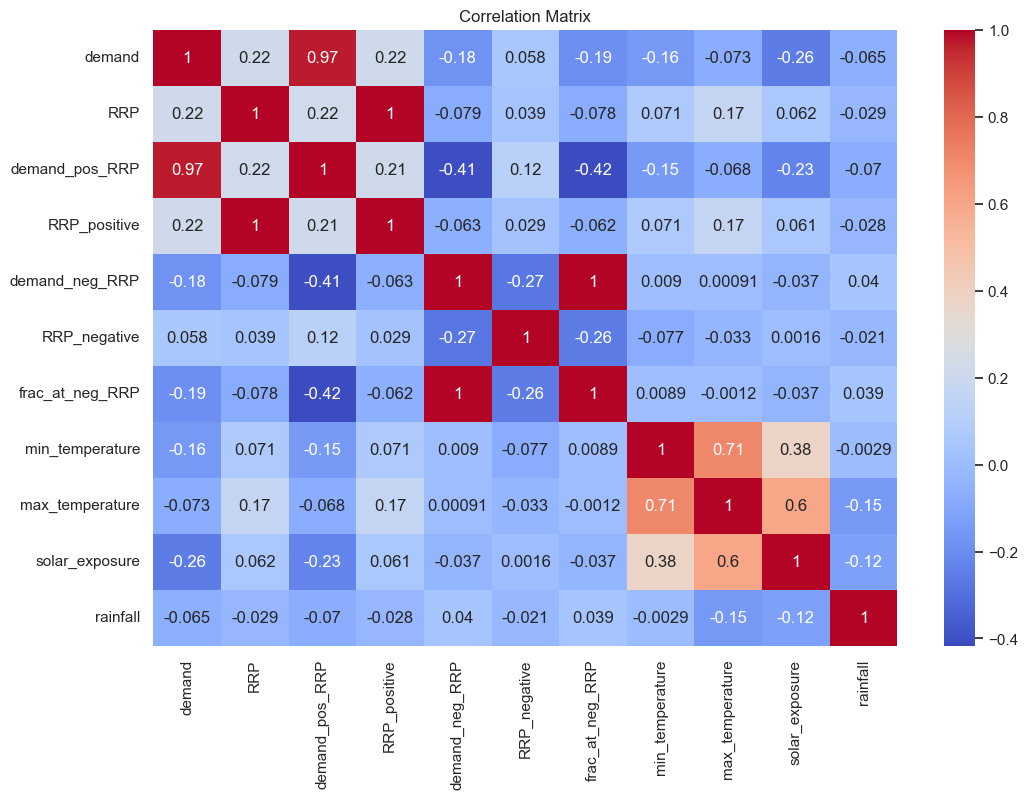

In [67]:
correlation_matrix = df[['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative',
                           'frac_at_neg_RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Why negative prices??**

1.High Renewable Energy Production

Wind and solar power generation can be unpredictable, sometimes producing more electricity than needed.
Wind farms, in particular, may continue operating even at negative prices due to subsidies or contracts.

2.Off-Peak Hours (Nighttime & Weekends)

Demand drops significantly at night, especially in industrial areas.
If supply remains high, prices can turn negative.

3.Storage Limitations

Unlike gas or oil, electricity is hard to store in large quantities.
If battery or pumped hydro storage isn’t available, excess electricity floods the market

**Dectecting & handling outliers**

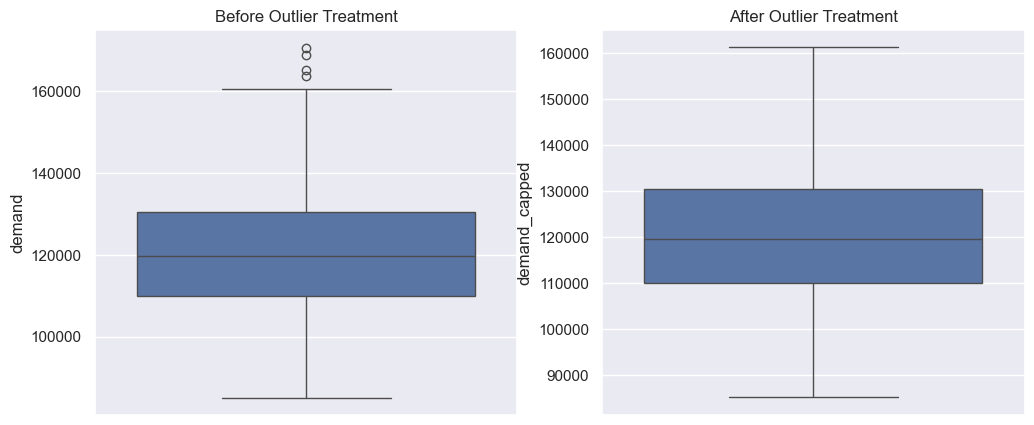

Number of outliers before capping: 4
Number of outliers after capping: 0


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'demand' exists and is numeric
df['demand'] = pd.to_numeric(df['demand'], errors='coerce')

# Drop rows with NaN in 'demand'
df = df.dropna(subset=['demand'])

# Detect Outliers using IQR
q1 = df['demand'].quantile(0.25)
q3 = df['demand'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Count the number of outliers before capping
outliers_before = df[(df['demand'] < lower_bound) | (df['demand'] > upper_bound)]

# Apply capping (Winsorization)
df['demand_capped'] = np.where(df['demand'] > upper_bound, upper_bound,
                               np.where(df['demand'] < lower_bound, lower_bound, df['demand']))

# Count the number of outliers after capping
outliers_after = df[(df['demand_capped'] < lower_bound) | (df['demand_capped'] > upper_bound)]

# Visualization: Boxplots Before and After Capping
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['demand'])
plt.title('Before Outlier Treatment')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['demand_capped'])
plt.title('After Outlier Treatment')

plt.show()

# Print outlier counts
print(f"Number of outliers before capping: {len(outliers_before)}")
print(f"Number of outliers after capping: {len(outliers_after)}")

**Demand Trend Over Time**

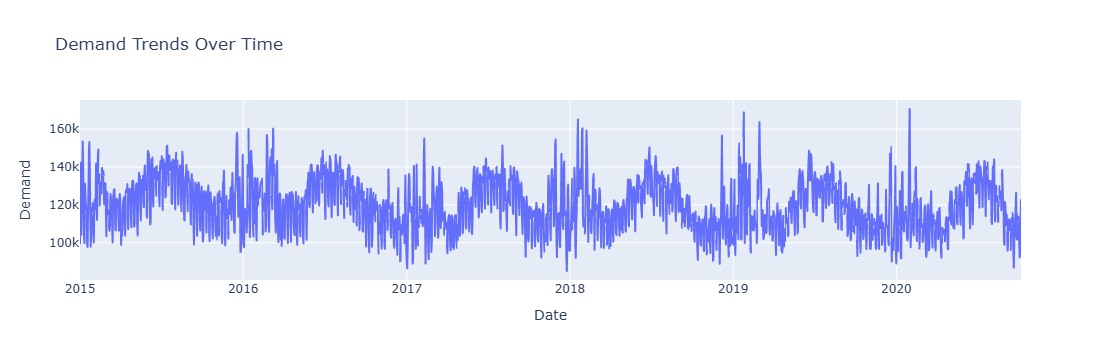

In [70]:
df=pd.read_csv("cleaned_data.csv")
import plotly.express as px

fig = px.line(df, x='date', y='demand',
              title='Demand Trends Over Time',
              labels={'date': 'Date', 'demand': 'Demand'},
              line_shape='linear')
fig.update_layout(xaxis_title='Date', yaxis_title='Demand')
fig.show()

**Relationship Between Demand and Max Temperature**

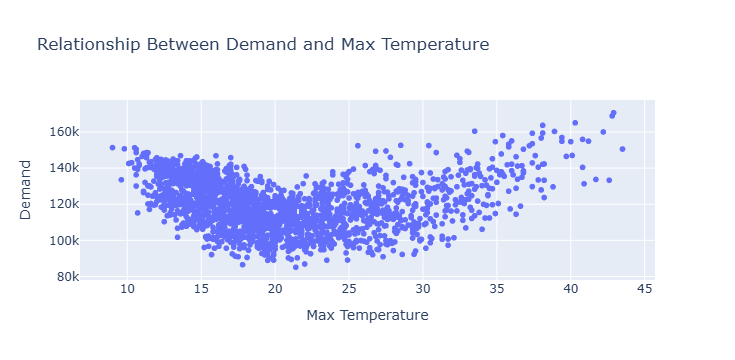

In [112]:
fig = px.scatter(df, x='max_temperature', y='demand',
                 title='Relationship Between Demand and Max Temperature',
                 labels={'max_temperature': 'Max Temperature', 'demand': 'Demand'})
fig.show()

**Solar Exposure on Demand**

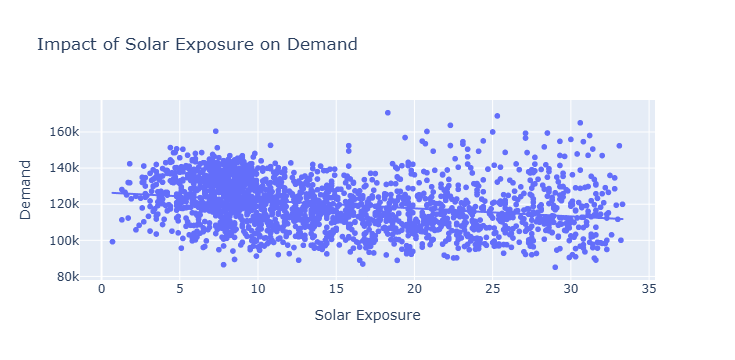

In [116]:
fig = px.scatter(df, x='solar_exposure', y='demand', trendline='ols',
                 title='Impact of Solar Exposure on Demand',
                 labels={'solar_exposure': 'Solar Exposure', 'demand': 'Demand'})
fig.show()

**CONCLUSION**

**Key insights**

1. Demand Patterns:

Electricity demand exhibits seasonal trends, with peaks during summer (due to cooling) and winter (due to heating).
Weekdays vs. Weekends: Higher demand on weekdays, especially during working hours.
Impact of School & Holidays: Demand fluctuates based on school days, public holidays, and major events.

2. Price Dynamics:

Prices are influenced by demand-supply imbalances, fuel costs, and market regulations.
Negative prices occur due to excess renewable generation, low demand, or grid constraints.
Peak pricing occurs during high-demand periods, such as evenings when residential consumption is at its highest.

**Revenue & Cost Optimization Strategies**

1)Renewable Energy & Storage Solutions
. Battery Storage: Store excess renewable energy for peak hours, reducing dependency on fossil fuels.
. Distributed Energy Resources (DERs): Integrate microgrids, rooftop solar, and wind power to reduce grid strain.
. Hybrid Energy Systems: Combine renewables with traditional power sources to maintain reliability.

2)Cost Reduction & Operational Efficiency
. Optimize Fuel Procurement: Secure cost-effective fuel contracts for power plants to minimize generation costs.
. Asset Maintenance: Use predictive analytics to reduce equipment failures and downtime.
📌.Automation & AI: Implement AI-driven energy management systems for real-time optimization.

